## Rejection Sampling for discrete variable basic

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as spst
import scipy.special as spsp

We have p(x), which is the target distribution. We can't easily sample from p(x)
We instead use q(x), which is easy to sample and its space includes p(x).
We want to find c>1 such that p(x)/q(x)<=c for all x in the space
Step 1 Generate U, sample from q(x), denote it as Y
Step 2 if U<p(y)/c/q(y), return x = y else go back to step 1


In [13]:
x = [1,2,3,4]
p = [0.1,0.6,0.1,0.2]
p2 = np.repeat(0.25,4)
c = np.max(p/p2)
def rejection_sampling():
    U  = spst.uniform.rvs()
    Y = np.floor(4*np.random.rand())+1
    while U > p[int(Y-1)]/c/p2[int(Y-1)]:
        U = spst.uniform.rvs()
        Y = np.floor(4*np.random.rand())+1
    return x[int(Y-1)]
        

<BarContainer object of 4 artists>

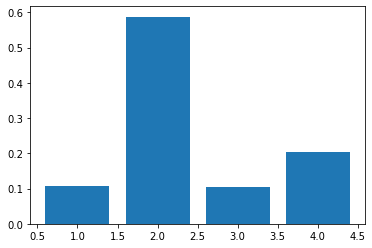

In [15]:
samples = [rejection_sampling() for i in range(10000)]
values,counts = np.unique(samples,return_counts = True)
plt.bar(values,counts/10000)

### Find the best p

The best p is achieved when smallest c is achieved. You need to create a function that returns different c, find the smallest c and argmin(C) to get the p. What lest is simply rejection sampling.

In [32]:
x = [0,1,2,3,4,5]
p = [0.4,0.25,0.15,0.1,0.05,0.05]
#use geoetric distribution
def createp(k):
    p1 = np.array([(1-k)**x*k for x in range(0,6)])
    return np.max(p/p1)
mylist = []
i = 0.1
while i <= 1:
    mylist.append(createp(i))
    i += 0.1
a = np.argmin(mylist)

In [60]:
a
p0 = 0.1 + a*0.1
c = mylist[a]
#when p is 0.3 it would be the best bet
c
p0

0.30000000000000004

In [76]:
def rejection_sampling():
    U = spst.uniform.rvs()
    Y = spst.geom.rvs(p0)-1
    while Y > 5 or U > p[Y]/c/((1-p0)**Y*p0):
        U = spst.uniform.rvs()
        Y = spst.geom.rvs(p0)-1
    return Y

In [77]:
rejection_sampling()

3

<BarContainer object of 6 artists>

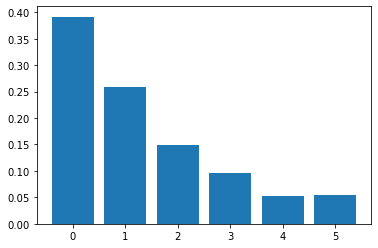

In [78]:
samples = [rejection_sampling() for i in range(10000)]
values,counts = np.unique(samples,return_counts = True)
plt.bar(values,counts/10000)